In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('avocado.csv')
df = df.drop(['type','year','region','Date','Unnamed: 0'],axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [48]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)

In [49]:
df_std

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.2326465 ,
        -0.22235202, -0.17557961],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.23156838,
        -0.22233464, -0.17557961],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.23339891,
        -0.22231148, -0.17557961],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ..., -0.23164379,
        -0.22256082, -0.17557961],
       [ 1.30138182, -0.24162464, -0.2304279 , ..., -0.22954271,
        -0.2225293 , -0.17557961],
       [ 0.53151208, -0.24125273, -0.22934712, ..., -0.22811058,
        -0.22262764, -0.17557961]])

In [50]:
features = df_std.T
features

array([[-0.18868864, -0.13901962, -1.18206895, ...,  1.15237477,
         1.30138182,  0.53151208],
       [-0.22771641, -0.23042664, -0.21208462, ..., -0.24233073,
        -0.24162464, -0.24125273],
       [-0.23081597, -0.23110251, -0.23100731, ..., -0.2306933 ,
        -0.2304279 , -0.22934712],
       ...,
       [-0.2326465 , -0.23156838, -0.23339891, ..., -0.23164379,
        -0.22954271, -0.22811058],
       [-0.22235202, -0.22233464, -0.22231148, ..., -0.22256082,
        -0.2225293 , -0.22262764],
       [-0.17557961, -0.17557961, -0.17557961, ..., -0.17557961,
        -0.17557961, -0.17557961]])

In [51]:
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.0000548 , -0.19276295, -0.20832846, -0.17293725, -0.17945582,
        -0.17709763, -0.17473936, -0.17294949, -0.11759807],
       [-0.19276295,  1.0000548 ,  0.97791675,  0.97423421,  0.87225005,
         0.96309986,  0.96729124,  0.88068789,  0.74719831],
       [-0.20832846,  0.97791675,  1.0000548 ,  0.92616071,  0.83343477,
         0.920107  ,  0.92533058,  0.83869097,  0.69941561],
       [-0.17293725,  0.97423421,  0.92616071,  1.0000548 ,  0.88790365,
         0.90583709,  0.91608143,  0.81005961,  0.6888465 ],
       [-0.17945582,  0.87225005,  0.83343477,  0.88790365,  1.0000548 ,
         0.79235771,  0.80277694,  0.6985093 ,  0.67989831],
       [-0.17709763,  0.96309986,  0.920107  ,  0.90583709,  0.79235771,
         1.0000548 ,  0.99438904,  0.94306075,  0.80427666],
       [-0.17473936,  0.96729124,  0.92533058,  0.91608143,  0.80277694,
         0.99438904,  1.0000548 ,  0.90263833,  0.80688884],
       [-0.17294949,  0.88068789,  0.83869097,  0.81005961,  0

In [52]:
from numpy import linalg as al

In [53]:
eig_val, eig_vec = al.eig(cov_matrix)

In [54]:
print('eig_val:\n', eig_val)

eig_val:
 [7.03346260e+00 9.63395844e-01 4.25630809e-01 3.35451025e-01
 1.30925654e-01 6.74197901e-02 4.42074880e-02 1.58182346e-10
 2.45762929e-15]


In [55]:
print('eig_vec:\n', eig_vec)

eig_vec:
 [[ 8.18962579e-02 -9.93228855e-01  7.28494565e-02  2.19787742e-02
   2.02697721e-03  3.11606912e-02  4.92318372e-03  2.77573759e-07
  -1.79030171e-10]
 [-3.73305274e-01 -1.72887292e-02  1.70224281e-01  6.65843611e-02
  -2.01980148e-01  1.38736017e-02 -9.87584598e-02 -8.81018047e-01
   4.05737839e-06]
 [-3.60564447e-01  1.01838975e-02  2.24040236e-01  1.08733474e-01
  -4.49279608e-01  7.07307618e-01 -3.99786986e-02  3.22704265e-01
  -1.48351550e-06]
 [-3.59416015e-01 -2.62721064e-02  3.46212157e-01 -5.92781179e-02
  -1.68026142e-01 -5.61672136e-01 -5.55596321e-01  3.07176672e-01
  -1.41671232e-06]
 [-3.31127895e-01 -1.75384782e-03  4.28029413e-01 -5.64017150e-01
   5.53624495e-01  1.35732295e-01  2.51697840e-01  2.74149163e-02
  -1.26078867e-07]
 [-3.69840250e-01 -4.13341354e-02 -1.60619360e-01  2.27523163e-01
   1.38042741e-02 -1.87665145e-01  3.56354131e-01  9.76124198e-02
  -7.82316513e-01]
 [-3.69460578e-01 -4.31336965e-02 -1.18563756e-01  1.41519435e-01
  -1.79931049e-01 

In [56]:
pc1 = eig_val[0]/sum(eig_val)
pc2 = (eig_val[1]+eig_val[0])/sum(eig_val)
print('PC 1 consist ',pc1*100,' % data')
print('PC 2 consist ',pc2*100,' % data')

PC 1 consist  78.1453019895503  % data
PC 2 consist  88.84911368263671  % data


In [57]:
#to find the pc
projected = df_std.dot(eig_vec[:2].T)
projected

array([[ 0.18064095,  0.28023525],
       [ 0.18723154,  0.26101928],
       [ 0.08472574,  0.65366714],
       ...,
       [ 0.30408391, -0.22417584],
       [ 0.3156748 , -0.27995014],
       [ 0.25235386,  0.00849362]])

In [58]:
projected.shape

(18249, 2)

In [59]:
result = pd.DataFrame(projected, columns=['PC1','PC2'])
result['y-axis'] = 0.0
result

,PC1,PC2,y-axis
0,0.180641,0.280235,0.0
1,0.187232,0.261019,0.0
2,0.084726,0.653667,0.0
3,0.125766,0.513069,0.0
4,0.173972,0.325938,0.0
...,...,...,...
18244,0.254493,-0.002100,0.0
18245,0.271505,-0.075388,0.0
18246,0.304084,-0.224176,0.0
18247,0.315675,-0.279950,0.0


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [61]:
#finding the error
X = df_std
Errors = []
for x in range(len(eig_vec)):
    G  = eig_vec.T[:x]
    X_Gt = np.dot(X,G.T)
    X_GGT = np.dot(X_Gt, G)
    e=sum(sum(np.subtract(np.array(X),np.array(X_GGT))**2))
    er = math.sqrt(e)
    Errors.append(er)

In [62]:
Errors

[405.2665789329595,
 189.45810766325812,
 135.3304370660963,
 102.70061442205603,
 66.5289854235296,
 45.13285470645871,
 28.40243378322475,
 0.0016989877205428642,
 6.868048431884304e-06]

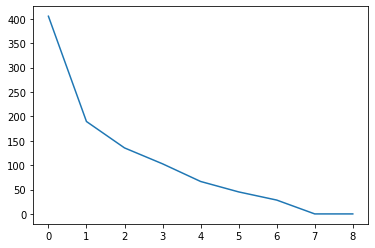

In [63]:
plt.plot(Errors)